Problem 1 (10% credit).
What can the principal component decomposition of the regressors help multivariate linear regression with (check all that apply): a) improve the fit accuracy (R2); b) remove correlations between regressors; c) improve the certainty of regression coefficients estimation (shrink confidence intervals for them); d) allow to better interpret impact of the regressors; e) increase a number of regressors to gain better prediction power; f) introduce new regressors that have more impact on the output variable.

Solution : b, because PCD is all about removing the corelation and bringing down the number of regressors based on corelation . 
not a. beause the higher the number of regressors the better the R2 value becomes 
not c. because it does not improve the certainty of regression coefficients.

In [70]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [71]:
data1 = pd.read_csv('https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework4/H41.csv' , index_col=0 )
#data1 = pd.read_csv('/Users/bhagwatsinghbisht/Downloads/H41.csv' , index_col=0 )
(N,n)=data1.shape
n=n-1
train1 = data1.loc[0:((N/2)-1),:]
valid1 = data1.loc[(N/2):(N-1),:]
len(valid1)
valid1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
100,0.021073,0.473330,-0.854525,-1.434702,-1.319011,0.602675,-0.627579,-1.546888,-1.434669,-0.003120,...,0.676649,0.397233,-0.035299,-0.426683,1.455772,2.030468,-0.843831,-0.002672,-0.177249,-0.090934
101,0.597511,0.257097,-0.308613,-0.818133,0.362574,0.712588,1.008610,0.210298,0.305236,-0.628875,...,1.873870,0.032842,-1.207351,-0.052605,1.215049,-1.272879,-0.684974,-1.042204,1.120010,-2.081685
102,2.152969,-0.739789,0.971372,0.866783,-1.153372,-1.112272,1.221799,-0.325436,0.641371,0.766197,...,-0.275757,0.561376,0.035587,0.395428,-0.291604,-0.519191,-0.230752,0.903643,1.141344,5.623493
103,0.321259,-0.646392,-0.468620,-0.680378,-0.292803,0.519052,0.093340,-0.699125,0.858503,0.081597,...,-0.798732,0.744467,-0.614448,1.687696,-1.866164,1.426627,-0.936641,1.150681,-0.271796,-1.511269
104,-1.134511,-1.250763,0.436301,0.618552,-0.411966,2.915248,-0.735903,2.421916,-1.750252,-0.663054,...,-1.225360,-1.593128,-0.716077,-0.872342,-1.177990,-1.648093,-0.567438,-1.511116,0.013016,3.660144


# Problem 2 (40% credit).
For the data above (training and validation sets) perform a multivariate regression of Y vs all the columns of X and implement a backward stepwise feature selection procedure (evaluating the models trained using different sets of features over the training set using the validation set). Report statistics for both - initial regression and the regression vs the selected subset of regressors.

In [74]:
##initial statistics :
lm=smf.ols(formula='Y ~ X1+X2+X3+X4+X5+X6+X7+X8+X9+X10+X11+X12+X13+X14+X15+X16+X17+X18+X19+X20-1',data=train1).fit()
lmy2=lm.predict(valid1)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     12.42
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           5.25e-17
Time:                        09:52:54   Log-Likelihood:                -217.17
No. Observations:                 100   AIC:                             474.3
Df Residuals:                      80   BIC:                             526.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1            -0.1257      0.226     -0.555      0.581        -0.576     0.325
X2            -0.1600      0.252     -0.636      0.527        -0.661     0.341
X3             0.9117      0.267      3.415      0.001         0.381     1.443
X4            -0.2560      0.305     -0.840      0.403        -0.863     0.351
X5            -3.0468      0.240    -12.693      0.000        -3.525    -2.569
X6            -0.5011      0.289     -1.732      0.087        -1.077     0.075
X7             0.8583      0.230      3.739      0.000         0.401     1.315
X8             0.0565      0.285      0.198      0.844        -0.512     0.625
X9            -0.4958      0.290     -1.711      0.091        -1.073     0.081
X10            0.2375      0.255      0.929      0.355        -0.271     0.746
X11            0.4010      0.317      1.264      0.210        -0.230     1.032
X12            0.2206      0.264      0.834      0.407        -0.306     0.747
X13           -0.1241      0.265     -0.469      0.640        -0.651     0.403
X14            0.2137      0.286      0.747      0.457        -0.355     0.783
X15            0.0910      0.314      0.290      0.773        -0.534     0.716
X16            0.2296      0.247      0.929      0.356        -0.262     0.721
X17            0.2337      0.289      0.810      0.421        -0.341     0.808
X18           -0.1703      0.300     -0.567      0.572        -0.768     0.427
X19           -0.2890      0.240     -1.204      0.232        -0.767     0.189
X20           -0.1021      0.268     -0.381      0.705        -0.636     0.432
==============================================================================
Omnibus:                        2.123   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.487
Skew:                           0.013   Prob(JB):                        0.475
Kurtosis:                       2.403   Cond. No.                         2.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Applying backward stepwise feature selection 
def regress(mask):
    formstr='Y~-1'
    for i in range(0,len(mask)):
        if mask[i]==1:
            formstr=formstr+'+X'+str(i+1)
    #print formstr
    lm = smf.ols(formula=formstr, data = train1).fit()
    lmy2 = lm.predict(valid1)
    R2=1-sum(pow(lmy2-valid1.Y,2))/sum(pow(valid1.Y-mean(valid1.Y),2))
    #R2=1-sum(pow(lmy2-valid.Y,2))*(n-1)/sum(pow(valid.Y-mean(valid.Y),2))/(n-sum(mask)-1)  ##adjusted r square.
    return (R2,lm)

In [73]:
n=20
mask0=[1]*n #initially none of the regressors are included
mask=mask0[:]
r20=regress(mask)[0]
while True:
    worstI=-1 # worst regressor to exclude
    for i in range(0,n):
        if (mask0[i]==1):
             mask=mask0[:]
             mask[i]=0
             r2=regress(mask)[0]
             #print((i,r2,r20))
             if (r2>r20):
                 r20=r2
                 worstI=i
    if (worstI>=0):
        mask0[worstI]=0
        print((worstI,r20))
    else:
        break
(r2,lm)= regress(mask0)
lm.summary()

(5, 0.6960538059403752)
(15, 0.7191016461680386)
(13, 0.7284142787654866)
(16, 0.7359099354027041)
(10, 0.7423556119004792)
(8, 0.7474664549371683)
(9, 0.7526975191920983)
(12, 0.7559625255138238)
(17, 0.7569431466521378)
(0, 0.7580003842978358)
(7, 0.758641577071861)
(1, 0.7594296489782312)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     30.34
Date:                Tue, 13 Oct 2015   Prob (F-statistic):           1.14e-22
Time:                        19:24:52   Log-Likelihood:                -223.20
No. Observations:                 100   AIC:                             462.4
Df Residuals:                      92   BIC:                             483.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X3             1.0003      0.251      3.978      0.000         0.501     1.500
X4            -0.0100      0.277     -0.036      0.971        -0.561     0.541
X5            -3.1736      0.220    -14.433      0.000        -3.610    -2.737
X7             0.7646      0.219      3.495      0.001         0.330     1.199
X12            0.1348      0.251      0.537      0.593        -0.364     0.634
X15           -0.1464      0.275     -0.532      0.596        -0.693     0.400
X19           -0.3416      0.229     -1.489      0.140        -0.797     0.114
X20            0.0090      0.249      0.036      0.971        -0.485     0.503
==============================================================================
Omnibus:                        2.347   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.309   Jarque-Bera (JB):                1.594
Skew:                          -0.042   Prob(JB):                        0.451
Kurtosis:                       2.387   Cond. No.                         1.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
data2 = pd.read_csv('https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework4/H42.csv' , index_col=0 )
data2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,10.261135,4.415661,3.185990,14.588875,-2.441283,1.994659,-2.832966,-4.060996,-9.552254,2.088611,4.332115
1,-6.484509,1.496613,-5.139275,8.612433,6.095630,6.515780,2.772823,-4.576894,-7.844913,-3.729653,-2.626149
2,2.213149,3.328561,2.493297,3.561928,3.432203,-6.106145,-2.403077,0.254194,2.485210,-4.857989,6.190211
3,-11.539916,1.168906,-5.640197,-12.757397,-3.153445,-5.316729,9.594091,5.387306,3.617259,6.098015,-4.949503
4,5.227771,-5.799965,1.170432,2.397935,5.572502,0.871541,2.330155,-2.214523,3.428943,-6.646335,2.131978


# Problem 4 (20% of credit)
For the regressors X from the above dataset 2 perform a principal component decomposition and visualize the percent of variation as a function of the number of selected leading principal components.

In [27]:
lm=smf.ols(formula='Y~X1+X2+X3+X4+X5+X6+X7+X8+X9+X10', data = data2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     34.49
Date:                Tue, 13 Oct 2015   Prob (F-statistic):           2.00e-26
Time:                        17:04:48   Log-Likelihood:                -204.22
No. Observations:                 100   AIC:                             430.4
Df Residuals:                      89   BIC:                             459.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2329      0.205     -1.137      0.259        -0.640     0.174
X1            -0.0123      0.036     -0.345      0.731        -0.083     0.059
X2             0.2951      0.070      4.232      0.000         0.157     0.434
X3             0.0946      0.110      0.862      0.391        -0.124     0.313
X4             0.1225      0.042      2.924      0.004         0.039     0.206
X5             0.3453      0.093      3.708      0.000         0.160     0.530
X6            -0.4233      0.061     -6.921      0.000        -0.545    -0.302
X7            -0.1868      0.089     -2.106      0.038        -0.363    -0.011
X8            -0.4046      0.088     -4.600      0.000        -0.579    -0.230
X9             0.1631      0.064      2.548      0.013         0.036     0.290
X10            0.0056      0.098      0.058      0.954        -0.188     0.200
==============================================================================
Omnibus:                        2.202   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.677
Skew:                           0.298   Prob(JB):                        0.432
Kurtosis:                       3.220   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
Y=np.matrix(data2.Y)
X=np.matrix(data2[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']])

In [29]:
m=mean(X,0)
s=std(X,0)
X1=1.0*np.array(X)
for i in xrange(0,4):
    X1[:,i]=(X1[:,i]-m[0,i])/s[0,i]

In [30]:
U, s, Vt = np.linalg.svd(X1) #singular value decomposition
V = Vt.T
#sort singular values
ind = np.argsort(s)[::-1] 
U = U[:, ind]
s = s[ind]
V = V[:, ind]
S = np.diag(s)
P=X1*np.matrix(V)
print(P)

[[  6.29518413e-01   7.25073207e+00   2.51660313e+00   7.13379312e+00
   -1.83218779e+00  -4.62798183e+00  -6.55350679e-01  -1.84143399e-02
    4.40682116e-01  -3.33754310e-03]
 [  1.93565182e+00   1.03495942e+01  -5.94181593e+00   4.69827971e+00
   -4.09739285e-02   3.85033756e+00   1.08778078e+00   1.22976230e+00
    3.22719698e-01  -2.42129113e-02]
 [  4.65967008e+00  -6.04263626e+00  -3.09203236e+00   1.30015204e+00
    3.77525141e+00   2.84481686e-01  -8.52297610e-01   8.24463102e-01
   -7.11011041e-02  -1.38228860e-01]
 [ -1.03027791e+01  -6.87014008e+00   5.08924225e+00  -1.13238937e+00
    1.98398530e-01   5.71460707e+00   1.02704588e+00   2.98173860e-01
    4.39354418e-01   2.79643387e-01]
 [  3.19724863e+00  -1.06029237e+00  -8.12292708e+00  -1.32009443e+00
    3.09154604e-01   4.27950910e+00  -1.08007236e+00   7.04748607e-01
    5.82104795e-01  -5.81272820e-02]
 [  1.04920617e+00   1.46766783e-01   3.72747041e-01  -5.29543717e+00
    1.22338371e+00   5.37667108e-01   3.20911

<Container object of 10 artists>

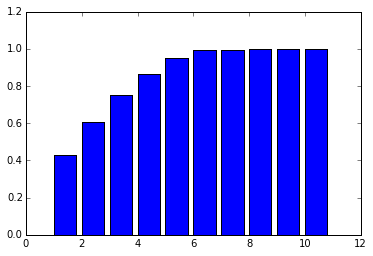

In [31]:
sc=cumsum(s**2/sum(s**2))
plt.bar(range(1,(len(sc)+1)),sc)



# Problem 5 (15% of credit)
For the principal component decomposition from the problem 4, visualize the data in a 2d and 3d coordinate system according to the 2 and 3 leading principal components correspondingly.

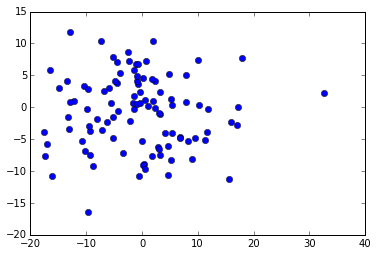

In [32]:
plt.plot(np.array(P[:,0]), np.array(P[:,1]),
        'o', color='blue', alpha=1, label='Data_PCA')

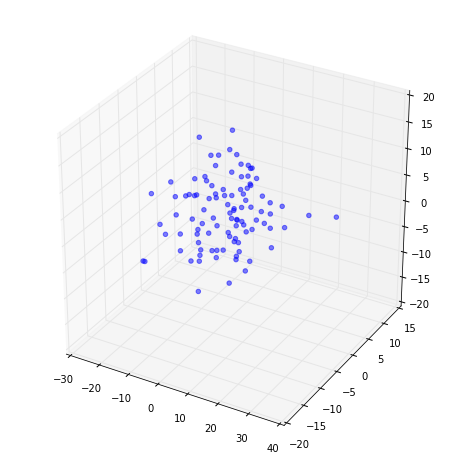

In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.scatter(np.array(P[:,0]), np.array(P[:,1]), np.array(P[:,2]),
        'o', color='blue', alpha=0.5, label='PCA3')

# Problem 6 (15% of credit)
For the dataset above select a minimal number of leading principal components necessary to cover at least 90% of the entire variation and perform multivariate regression of the output variable Y vs those selected components.

In [34]:
## from the above graph it is clear that the number of leading principal components necessary to cover at least 90% of the
## entire variation is X1 to X5.
Y=np.matrix(data2.Y)
X=np.matrix(data2[['X1','X2','X3','X4','X5']])

In [35]:
m=mean(X,0)
s=std(X,0)
X1=1.0*np.array(X)
for i in xrange(0,4):
    X1[:,i]=(X1[:,i]-m[0,i])/s[0,i]

In [36]:
U, s, Vt = np.linalg.svd(X1) #singular value decomposition
V = Vt.T
#sort singular values
ind = np.argsort(s)[::-1] 
U = U[:, ind]
s = s[ind]
V = V[:, ind]
S = np.diag(s)
P=X1*np.matrix(V)
print(P)

[[ -2.35962820e+00   1.58372220e+00  -1.72196338e+00  -6.15051560e-01
    2.63615737e-01]
 [  6.13770023e+00   1.96336438e-01   5.64793022e-01  -1.08992159e+00
    3.24433145e-01]
 [  3.42081136e+00   1.40367070e-01  -5.40842711e-01  -3.55043251e-01
   -4.47053444e-01]
 [ -3.18534688e+00  -6.39284107e-01   2.03654909e+00   5.25749335e-01
   -2.30595660e-01]
 [  5.54569340e+00  -7.49211959e-01  -9.97048312e-01  -5.23833848e-03
    3.89287310e-01]
 [  1.04276877e+00  -9.08820584e-02   5.87285006e-01  -4.24541101e-03
   -8.10071210e-02]
 [ -3.66215851e+00   1.31553099e+00  -1.44421358e+00   8.05200765e-02
    4.11419017e-01]
 [ -6.11956412e+00  -1.82911997e+00  -2.25167107e+00  -2.87385916e+00
   -1.76785556e-01]
 [ -3.83470491e+00  -2.57674167e+00  -9.36888668e-01   9.42359654e-02
   -6.19960450e-01]
 [ -1.05293273e+00   8.98630707e-01   4.14913414e-01  -5.32286326e-01
    2.68314930e-01]
 [ -2.09042702e+00   1.29093597e+00   1.08547583e-01  -6.19829644e-01
   -1.31425325e-01]
 [ -8.6047

<Container object of 5 artists>

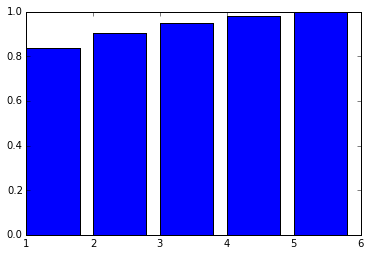

In [37]:
sc=cumsum(s**2/sum(s**2))
plt.bar(range(1,(len(sc)+1)),sc)

